<a href="https://colab.research.google.com/github/khenm/-heart_disease_pred_review/blob/develop/Heart_Disese_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Heart Disease Prediction
#### Background
<p align='justify'>
Heart Disease is a serious health issue globally, accounting for a significant percentage of mortality rate. Early detection and accurate prediction of heart disease risk can lead to timely interventions and improved patient outcomes. In this project, we will integrate various Machine Learning model to predict the heart disease and compare each model to achieve the best result.
</p>

In [ ]:
# Download dataset
!gdown 1zOj808OstnkaWlltM4qKNjjT3iT3yeMN

Downloading...
From: https://drive.google.com/uc?id=1zOj808OstnkaWlltM4qKNjjT3iT3yeMN
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 18.8MB/s]


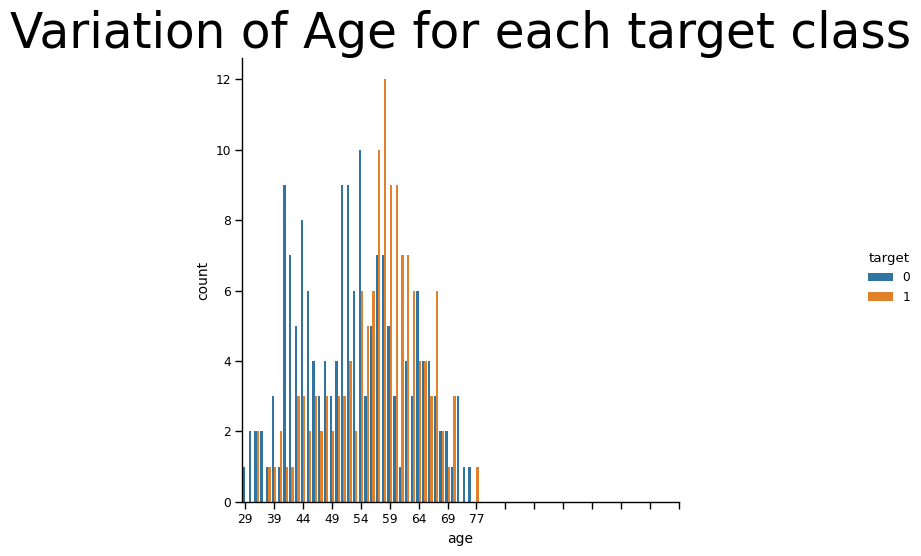

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# distribution of target vs age
sns.set_context("paper", font_scale=1,
                rc={'font.size':4, 'axes.titlesize':35, 'axes.labelsize':10})
ax = sns.catplot(kind="count", data=df, x='age', hue='target', order=df['age'].sort_values().unique())
ax.ax.set_xticks(np.arange(0, 80, 5))
plt.title('Variation of Age for each target class')
plt.show()

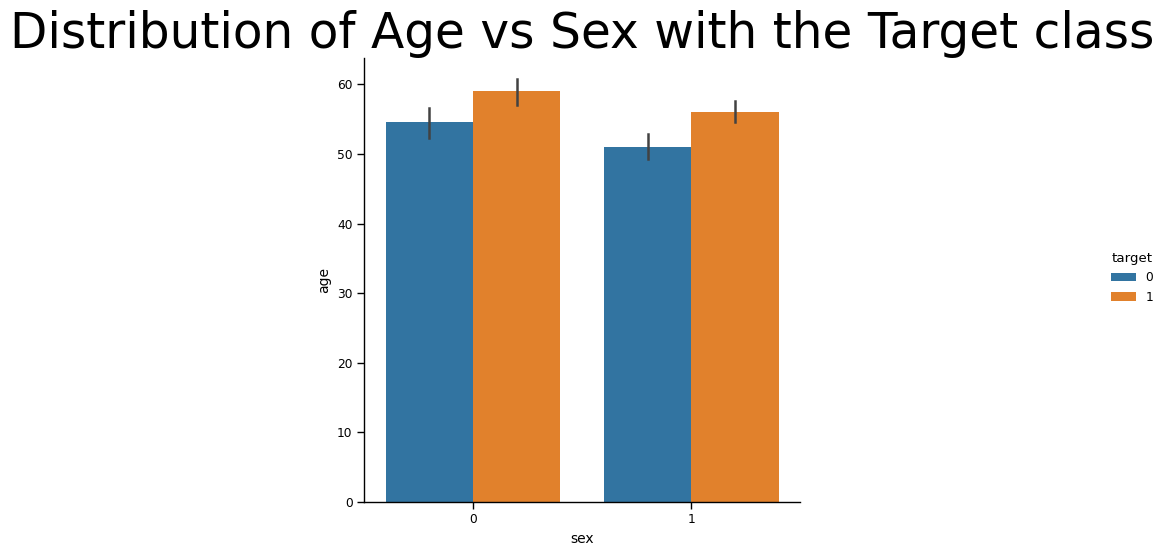

In [ ]:
# Bar plot of age vs sex with hue = target
sns.catplot(data=df, y='age', x='sex', hue='target', kind='bar')
plt.title('Distribution of Age vs Sex with the Target class')
plt.show()

In [ ]:
#@title Using KNN to predict heart disease
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Split the dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = knn.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

# Accuracy Score
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for KNeighborsClassifier: ', accuracy_for_train)
print('Accuracy for test set for KNeighborsClassifier: ', accuracy_for_test)


Accuracy for training set for KNeighborsClassifier:  0.76
Accuracy for test set for KNeighborsClassifier:  0.69


In [ ]:
#@title Using SVM to predict heart disease
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Split dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Confusion matrix
cm_test = confusion_matrix(y_pred, y_test)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for SVC: ', accuracy_for_train)
print('Accuracy for test set for SVC: ', accuracy_for_test)

Accuracy for training set for SVC:  0.66
Accuracy for test set for SVC:  0.67


In [ ]:
#@title Using Naive Bayes to predict heart disease
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Split dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Confusion matrix
cm_test = confusion_matrix(y_pred, y_test)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

# Accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for GaussianNB: ', accuracy_for_train)
print('Accuracy for test set for GaussianNB: ', accuracy_for_test)

Accuracy for training set for GaussianNB:  0.85
Accuracy for test set for GaussianNB:  0.84


In [ ]:
#@title Using Decision Tree to predict heart disease
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Split dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Confusion matrix
cm_test = confusion_matrix(y_pred, y_test)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

# Accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Decision Tree: ', accuracy_for_train)
print('Accuracy for test set for Decision Tree: ', accuracy_for_test)

Accuracy for training set for GaussianNB:  1.0
Accuracy for test set for GaussianNB:  0.75


In [ ]:
#@title Using Random Forest to predict heart disease
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Split dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
classifier = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Confusion matrix
cm_test = confusion_matrix(y_pred, y_test)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

# Accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Random Forest: ', accuracy_for_train)
print('Accuracy for test set for Random Forest: ', accuracy_for_test)

Accuracy for training set for GaussianNB:  0.98
Accuracy for test set for GaussianNB:  0.8


In [ ]:
#@title Using Adaboost to predict heart disease
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

# Split dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42, algorithm="SAMME")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Confusion matrix
cm_test = confusion_matrix(y_pred, y_test)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

# Accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Adaboost: ', accuracy_for_train)
print('Accuracy for test set for Adaboost: ', accuracy_for_test)

Accuracy for training set for Adaboost:  0.88
Accuracy for test set for Adaboost:  0.9


In [ ]:
#@title Using Gradient Boost to predict heart disease
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# Split dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Confusion matrix
cm_test = confusion_matrix(y_pred, y_test)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

# Accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for GradientBoost: ', accuracy_for_train)
print('Accuracy for test set for GradientBoost: ', accuracy_for_test)

Accuracy for training set for GradientBoost:  1.0
Accuracy for test set for GradientBoost:  0.85


In [ ]:
#@title Using XGBoost to predict heart disease
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Split dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
xg = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

# Confusion matrix
cm_test = confusion_matrix(y_pred, y_test)
y_pred_train = xg.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

# Accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for XGBoost: ', accuracy_for_train)
print('Accuracy for test set for XGBoost: ', accuracy_for_test)

Accuracy for training set for XGBoost:  1.0
Accuracy for test set for XGBoost:  0.87


In [ ]:
#@title Using Stacking  to predict heart disease
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix

# Split dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier()
gc = GradientBoostingClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)

# Stacking Classifier
clf = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('xgb', xgb), ('gc', gc), ('ada', ada), ('svc', svc)]
xg = XGBClassifier()
classifier = StackingClassifier(estimators=clf, final_estimator=xg)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Confusion matrix
cm_test = confusion_matrix(y_pred, y_test)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

# Accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Stacking: ', accuracy_for_train)
print('Accuracy for test set for Stacking: ', accuracy_for_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy for training set for Stacking:  0.98
Accuracy for test set for Stacking:  0.89
